In [2]:

import zipfile
import random
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop,Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
from keras import layers
from keras import models
from PIL import Image
import matplotlib.pyplot as plt
import cv2
# import transform
# import torchvision
# import torch

In [1]:
import os
##import os, shutil
# The path to the directory where the original
# dataset was uncompressed
original_dataset_dir = 'C:\\Users\\a\Documents\\casa\\casa0018\\final\\faceMask\\FaceMaskDataset\\'

base_dir = 'C:\\Users\\a\Documents\\casa\\casa0018\\final\\faceMask\\base'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
train_face_mask_dir = os.path.join(train_dir, 'face_mask')
train_no_face_mask_dir = os.path.join(train_dir, 'no_face_mask')
validation_face_mask_dir = os.path.join(validation_dir, 'face_mask')
validation_no_face_mask_dir = os.path.join(validation_dir, 'no_face_mask')

try:
    # The directory where we will store our smaller dataset
    
    os.mkdir(base_dir)

    # Directories for our training,
    # validation and test splits
    
    os.mkdir(train_dir)
   # validation_dir = os.path.join(base_dir, 'validation')
    os.mkdir(validation_dir)
#     test_dir = os.path.join(base_dir, 'test')
#     os.mkdir(test_dir)

    # Directory with our training face mask pictures
#     train_face_mask_dir = os.path.join(train_dir, 'face_mask')
    os.mkdir(train_face_mask_dir)

    # Directory with our training no face mask pictures
#     train_no_face_mask_dir = os.path.join(train_dir, 'no_face_mask')
    os.mkdir(train_no_face_mask_dir)

    # Directory with our validation face mask pictures
#     validation_face_mask_dir = os.path.join(validation_dir, 'face_mask')
    os.mkdir(validation_face_mask_dir)

    # Directory with our validation no face mask pictures
#     validation_no_face_mask_dir = os.path.join(validation_dir, 'no_face_mask')
    os.mkdir(validation_no_face_mask_dir)


except OSError:
    pass


In [11]:
import json
import shutil,os
from xml.dom import minidom
def dis(datadir,maskDir,noMaskDir):
    path = original_dataset_dir+datadir #position of the folder where xml andjpg files are
    filelist = os.listdir(path)
    facelist=[]      #put picture 
    masklist=[]
    for file in filelist:
        if ( ".xml" in file ):
            picture1 = file.split(".",1) #use“.”to divide the file name
            picture=picture1[0]   #get the file name
            compPath=os.path.join(path, file)

            names=minidom.parse(compPath).getElementsByTagName('name')
            try:
                if names[0].firstChild.data=='face_mask':

                    masklist.append(picture)
                else:
                    facelist.append(picture)
            except IndexError:
                print(compPath)
        else:
            continue
    for pic in masklist:
        fill(path+pic+".jpg",maskDir+ '\\'+pic+".jpg")
#         shutil.copy(path+pic+".jpg", maskDir) #//put the .jpg which has the same name of  .xml to the folder
       
    for pic in facelist:
        fill(path+pic+".jpg",noMaskDir+ '\\'+pic+".jpg")
#         shutil.copy(path+pic+".jpg", noMaskDir)


In [22]:

def fill(inpath,outpath): 
    image=Image.open(inpath)
    image = image.convert('RGB')
    w, h = image.size
    background = Image.new('RGB', size=(max(w, h), max(w, h)), color=(127, 127, 127))  # create background，color is 127
    length = int(abs(w - h) // 2)  # the length to fill
    box = (length, 0) if w < h else (0, length)  # place to put
    background.paste(image, box)
    image_data=background.resize((256,256))#resize it smaller first
    image_data.save(outpath)

In [29]:
def distri(dir):
    path0 = 'C:\\Users\\a\Documents\\casa\\casa0018\\final\\faceMask'
    filelist = os.listdir(path0+'\\base1'+dir)
    
    for file in filelist:
        fill(path0+'\\base1'+dir+ file,path0+'\\base2'+dir+ file)

In [46]:
distri('\\validation\\face_mask\\')
distri('\\validation\\no_face_mask\\')


In [ ]:
dis('train\\',train_face_mask_dir, train_no_face_mask_dir)
dis('val\\',validation_face_mask_dir,validation_no_face_mask_dir)

In [3]:
print(len(os.listdir(train_face_mask_dir)))
print(len(os.listdir(train_no_face_mask_dir)))
print(len(os.listdir(validation_no_face_mask_dir)))
print(len(os.listdir(validation_face_mask_dir)))

2269
3849
1040
799


In [4]:
TRAINING_DIR = train_dir
train_datagen = ImageDataGenerator(rescale=1.0/255)#rescale=1.0/255.
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=50,
                                                    class_mode='binary',
                                                    target_size=(150, 150))

VALIDATION_DIR = validation_dir
validation_datagen = ImageDataGenerator(rescale=1.0/255)#.
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=50,
                                                              class_mode='binary',
                                                              target_size=(150, 150))

Found 6118 images belonging to 2 classes.
Found 1839 images belonging to 2 classes.


In [6]:
import tensorflow as tf
from matplotlib import pyplot
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [56]:
def fit_model(lr,axes):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(150, 150, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
#         tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
#         tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer=RMSprop(lr=lr), loss='binary_crossentropy', metrics=['acc'])
    # fit model
    history = model.fit(
      train_generator,
      steps_per_epoch=8,
      epochs=15,
      validation_data=validation_generator,
      validation_steps=6)
    # plot learning curves
    axes.plot(history.history['acc'],'r',label='Training accuracy')
    axes.plot(history.history['val_acc'],'b',label='Validation Accuracy')
    title ='learning rate ='+str(lr)
    axes.set_title(title)
    axes.legend()
    

Epoch 1/15
8/8 [==============================] - 8s 856ms/step - loss: 0.6763 - acc: 0.5825 - val_loss: 0.6649 - val_acc: 0.6467
Epoch 2/15
8/8 [==============================] - 6s 822ms/step - loss: 0.6466 - acc: 0.6803 - val_loss: 0.6513 - val_acc: 0.6567
Epoch 3/15
8/8 [==============================] - 6s 806ms/step - loss: 0.6115 - acc: 0.7429 - val_loss: 0.6376 - val_acc: 0.7267
Epoch 4/15
8/8 [==============================] - 6s 807ms/step - loss: 0.6013 - acc: 0.7717 - val_loss: 0.6335 - val_acc: 0.6300
Epoch 5/15
8/8 [==============================] - 7s 832ms/step - loss: 0.5722 - acc: 0.7717 - val_loss: 0.6019 - val_acc: 0.7800
Epoch 6/15
8/8 [==============================] - 6s 818ms/step - loss: 0.5672 - acc: 0.8046 - val_loss: 0.6163 - val_acc: 0.6200
Epoch 7/15
8/8 [==============================] - 7s 829ms/step - loss: 0.5485 - acc: 0.7510 - val_loss: 0.5764 - val_acc: 0.8000
Epoch 8/15
8/8 [==============================] - 7s 867ms/step - loss: 0.5292 - acc: 0.84

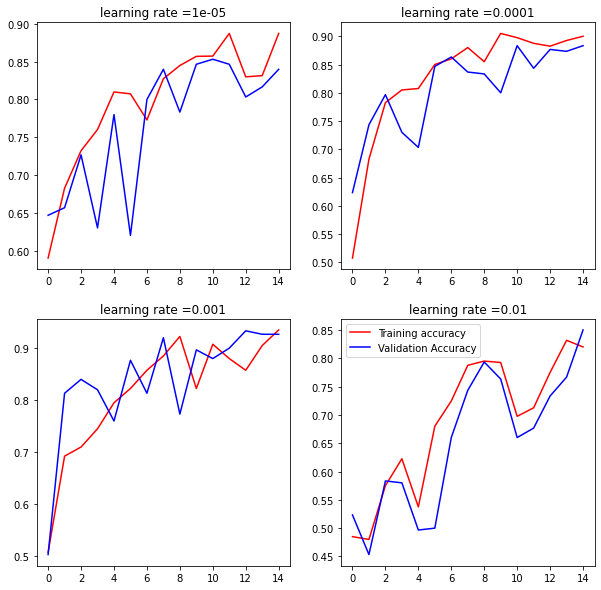

In [57]:
lr=[0.00001,0.0001,0.001,0.01]
fig,axes=pyplot.subplots(2,2,figsize=(12,7))
for i in range(len(lr)):
    fit_model(lr[i],axes[i//2,i%2])
# show learning curves

pyplot.show()


In [15]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
#     tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
    
])

model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 82944)             0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 82944)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)              

In [16]:
history = model.fit(
      train_generator,
      steps_per_epoch=60,
      epochs=15,
      validation_data=validation_generator,
      validation_steps=6)

Epoch 1/15
60/60 [==============================] - 72s 1s/step - loss: 0.5983 - acc: 0.7015 - val_loss: 0.3605 - val_acc: 0.8800
Epoch 2/15
60/60 [==============================] - 72s 1s/step - loss: 0.3069 - acc: 0.8699 - val_loss: 0.4007 - val_acc: 0.8467
Epoch 3/15
60/60 [==============================] - 80s 1s/step - loss: 0.1857 - acc: 0.9326 - val_loss: 0.2412 - val_acc: 0.9133
Epoch 4/15
60/60 [==============================] - 87s 1s/step - loss: 0.1727 - acc: 0.9419 - val_loss: 0.2837 - val_acc: 0.9000
Epoch 5/15
60/60 [==============================] - 86s 1s/step - loss: 0.1357 - acc: 0.9553 - val_loss: 0.2407 - val_acc: 0.9033
Epoch 6/15
60/60 [==============================] - 86s 1s/step - loss: 0.1318 - acc: 0.9572 - val_loss: 0.2668 - val_acc: 0.9200
Epoch 7/15
60/60 [==============================] - 91s 2s/step - loss: 0.1013 - acc: 0.9691 - val_loss: 0.2178 - val_acc: 0.9367
Epoch 8/15
60/60 [==============================] - 76s 1s/step - loss: 0.0871 - acc: 0.97

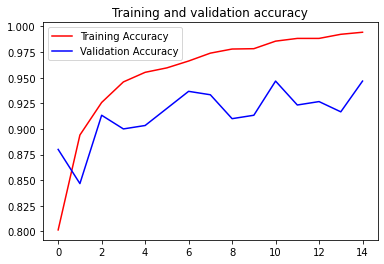

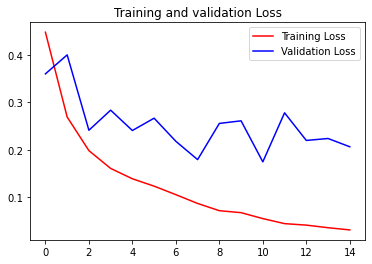

<Figure size 432x288 with 0 Axes>

In [17]:
# %matplotlib inline

#import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation Loss')
plt.legend(loc=0)
plt.figure()

plt.show()

# Desired output. Charts with training and validation metrics. No crash

In [33]:
model_path = "./modelfxh"

if not os.path.exists(model_path):
    os.mkdir(model_path)

callback = tf.keras.callbacks.ModelCheckpoint(filepath=model_path,
                                              save_weights_only=False,
                                              verbose=1)

In [34]:
tf.saved_model.save(model, './modelfxh')

INFO:tensorflow:Assets written to: ./modelfxh\assets


INFO:tensorflow:Assets written to: ./modelfxh\assets


In [ ]:
from tensorflow.python.framework.convert_to_constants import convert_variables_to_constants_v2
# Convert Keras model to ConcreteFunction
full_model = tf.function(lambda x: model(x))
full_model = full_model.get_concrete_function(
    tf.TensorSpec(model.inputs[0].shape, model.inputs[0].dtype))

# Get frozen ConcreteFunction
frozen_func = convert_variables_to_constants_v2(full_model)
frozen_func.graph.as_graph_def()

layers = [op.name for op in frozen_func.graph.get_operations()]
print("-" * 50)
print("Frozen model layers: ")
for layer in layers:
    print(layer)

print("-" * 50)
print("Frozen model inputs: ")
print(frozen_func.inputs)
print("Frozen model outputs: ")
print(frozen_func.outputs)

# Save frozen graph from frozen ConcreteFunction to hard drive
tf.io.write_graph(graph_or_graph_def=frozen_func.graph,
                  logdir="./frozen_models",
                  name="frozen_graph.pb",
                  as_text=False)

In [7]:
new_model = tf.keras.models.load_model('C:\\Users\\a\\Documents\\casa\\casa0018\\final\\modelfxh')
new_model

In [ ]:
import cv2
from keras.preprocessing import image
from keras.models import load_model
import numpy as np
import dlib
from PIL import Image
model = load_model('C:\\Users\\a\\Documents\\casa\\casa0018\\final\\check_point.h5')
detector = dlib.get_frontal_face_detector()
video=cv2.VideoCapture(0)
font = cv2.FONT_HERSHEY_SIMPLEX
def rec(img):
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    dets=detector(gray,1)
    if dets is not None:
        for face in dets:
            left=face.left()
            top=face.top()
            right=face.right()
            bottom=face.bottom()
            cv2.rectangle(img,(left,top),(right,bottom),(0,255,0),2)
            img1=cv2.resize(img[top:bottom,left:right],dsize=(150,150))
            img1=cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
            img1 = np.array(img1)/255.
            img_tensor = img1.reshape(-1,150,150,3)
            prediction =model.predict(img_tensor)    
            if prediction[0][0]>0.5:
                result='unsmile'
            else:
                result='smile'
            cv2.putText(img, result, (left,top), font, 2, (0, 255, 0), 2, cv2.LINE_AA)
        cv2.imshow('Video', img)
while video.isOpened():
    res, img_rd = video.read()
    if not res:
        break
    rec(img_rd)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
video.release()
cv2.destroyAllWindows()


In [107]:
model.evaluate(test_generator)

1/1 [==============================] - 0s 146ms/step - loss: 0.6398 - acc: 0.7500


[0.639792263507843, 0.75]

In [106]:
test_datagen = ImageDataGenerator(rescale=1.0/255)#.
test_generator = test_datagen.flow_from_directory('C:\\Users\\a\Documents\\casa\\casa0018\\final\\test',
                                                              batch_size=50,
                                                              class_mode='binary',
                                                              target_size=(150, 150))

Found 12 images belonging to 2 classes.


In [24]:
 import tensorflow as tf

# Convert the model.
converter = tf.compat.v1.lite.TFLiteConverter.from_saved_model('C:\\Users\\a\\Documents\\casa\\casa0018\\final\\modelfxh')
tflite_model = converter.convert()

# Save the model.
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Restoring parameters from C:\Users\a\Documents\casa\casa0018\final\modelfxh\variables\variables


INFO:tensorflow:Restoring parameters from C:\Users\a\Documents\casa\casa0018\final\modelfxh\variables\variables


INFO:tensorflow:The given SavedModel MetaGraphDef contains SignatureDefs with the following keys: {'serving_default', '__saved_model_init_op'}


INFO:tensorflow:The given SavedModel MetaGraphDef contains SignatureDefs with the following keys: {'serving_default', '__saved_model_init_op'}


INFO:tensorflow:input tensors info: 


INFO:tensorflow:input tensors info: 


INFO:tensorflow:Tensor's key in saved_model's tensor_map: conv2d_input


INFO:tensorflow:Tensor's key in saved_model's tensor_map: conv2d_input


INFO:tensorflow: tensor name: serving_default_conv2d_input:0, shape: (-1, 150, 150, 3), type: DT_FLOAT


INFO:tensorflow: tensor name: serving_default_conv2d_input:0, shape: (-1, 150, 150, 3), type: DT_FLOAT


INFO:tensorflow:output tensors info: 


INFO:tensorflow:output tensors info: 


INFO:tensorflow:Tensor's key in saved_model's tensor_map: dense_1


INFO:tensorflow:Tensor's key in saved_model's tensor_map: dense_1


INFO:tensorflow: tensor name: StatefulPartitionedCall:0, shape: (-1, 1), type: DT_FLOAT


INFO:tensorflow: tensor name: StatefulPartitionedCall:0, shape: (-1, 1), type: DT_FLOAT


INFO:tensorflow:Restoring parameters from C:\Users\a\Documents\casa\casa0018\final\modelfxh\variables\variables


INFO:tensorflow:Restoring parameters from C:\Users\a\Documents\casa\casa0018\final\modelfxh\variables\variables


INFO:tensorflow:Restoring parameters from C:\Users\a\Documents\casa\casa0018\final\modelfxh\variables\variables


INFO:tensorflow:Restoring parameters from C:\Users\a\Documents\casa\casa0018\final\modelfxh\variables\variables


INFO:tensorflow:The given SavedModel MetaGraphDef contains SignatureDefs with the following keys: {'serving_default', '__saved_model_init_op'}


INFO:tensorflow:The given SavedModel MetaGraphDef contains SignatureDefs with the following keys: {'serving_default', '__saved_model_init_op'}


INFO:tensorflow:input tensors info: 


INFO:tensorflow:input tensors info: 


INFO:tensorflow:Tensor's key in saved_model's tensor_map: conv2d_input


INFO:tensorflow:Tensor's key in saved_model's tensor_map: conv2d_input


INFO:tensorflow: tensor name: serving_default_conv2d_input:0, shape: (-1, 150, 150, 3), type: DT_FLOAT


INFO:tensorflow: tensor name: serving_default_conv2d_input:0, shape: (-1, 150, 150, 3), type: DT_FLOAT


INFO:tensorflow:output tensors info: 


INFO:tensorflow:output tensors info: 


INFO:tensorflow:Tensor's key in saved_model's tensor_map: dense_1


INFO:tensorflow:Tensor's key in saved_model's tensor_map: dense_1


INFO:tensorflow: tensor name: StatefulPartitionedCall:0, shape: (-1, 1), type: DT_FLOAT


INFO:tensorflow: tensor name: StatefulPartitionedCall:0, shape: (-1, 1), type: DT_FLOAT


INFO:tensorflow:Restoring parameters from C:\Users\a\Documents\casa\casa0018\final\modelfxh\variables\variables


INFO:tensorflow:Restoring parameters from C:\Users\a\Documents\casa\casa0018\final\modelfxh\variables\variables
Use '@tf.function' or '@defun' to decorate the function.Use '@tf.function' or '@defun' to decorate the function.Use '@tf.function' or '@defun' to decorate the function.Use '@tf.function' or '@defun' to decorate the function.Use '@tf.function' or '@defun' to decorate the function.Use '@tf.function' or '@defun' to decorate the function.Use '@tf.function' or '@defun' to decorate the function.Use '@tf.function' or '@defun' to decorate the function.Use '@tf.function' or '@defun' to decorate the function.Use '@tf.function' or '@defun' to decorate the function.Use '@tf.function' or '@defun' to decorate the function.Use '@tf.function' or '@defun' to decorate the function.Use '@tf.function' or '@defun' to decorate the function.Use '@tf.function' or '@defun' to decorate the function.Use '@tf.function' or '@defun' to decorate the function.Use '@tf.function' or '@defun' to decorate the f

In [ ]:
from markdown import markdown
import pdfkit
 
path_wk = r'C:\Users\a\Downloads\wkhtmltox-0.12.6-1.msvc2015-win64.exe' #安装位置
config = pdfkit.configuration(wkhtmltopdf = path_wk)
 
input_filename = '.\\README.md'
output_filename = 'wsl.pdf'
 
with open(input_filename, 'r') as f:
    html_text = markdown(f.read(), output_format='html4')
 
pdfkit.from_string(html_text, output_filename, configuration = config)